# IMPORT LIBRARY

In [14]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

In [15]:
# download image

In [16]:
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
urllib.request.urlretrieve(url, 'lena.jpg')
print("✅ lena.jpg berhasil diunduh!")

✅ lena.jpg berhasil diunduh!


# fungsi menampilkan citra + histogram

In [19]:
def show_image_hist(img, title='Image'):
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.imshow(img, cmap = 'gray' if len (img.shape) == 2 else None)
    plt.title(f'{title}Image')
    plt.axis('off')

    plt.subplot(1,2,2)
    if len(img.shape)==2:
        plt.hist(img.ravel(), bins = 256, range = (0, 256), color = 'k')
    else:
        import cv2
        rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for i , c in enumerate (('r', 'g', 'b')):
            plt.hist(rgb[:,:,i].ravel(),bins = 256, range = (0, 2546), color = c, alpha = 0.5)
    plt.title(f'{title} Histogram')
    plt.xlim(0,255)

    plt.tight_layout()
    plt.show()

# menampilkan rgb dan grayscale

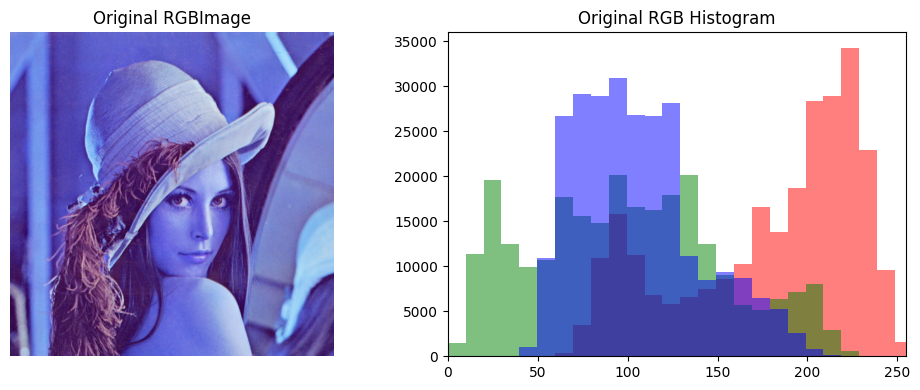

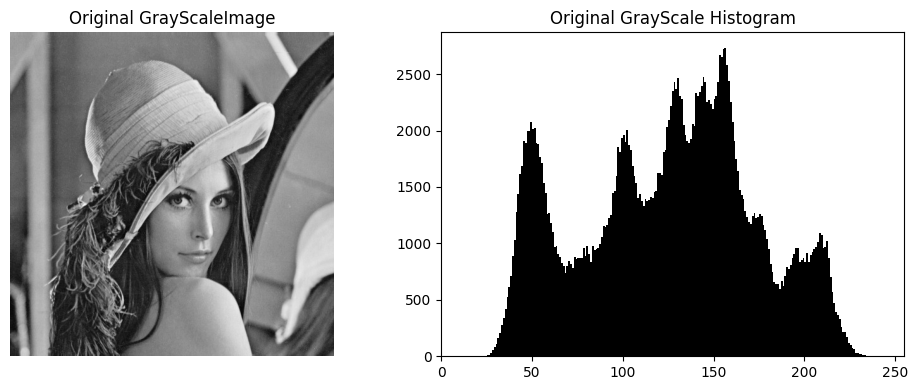

In [21]:
img_color = cv2.imread("lena.jpg")
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

show_image_hist(img_color, 'Original RGB')
show_image_hist(img_gray, 'Original GrayScale')

# NORMALISASI

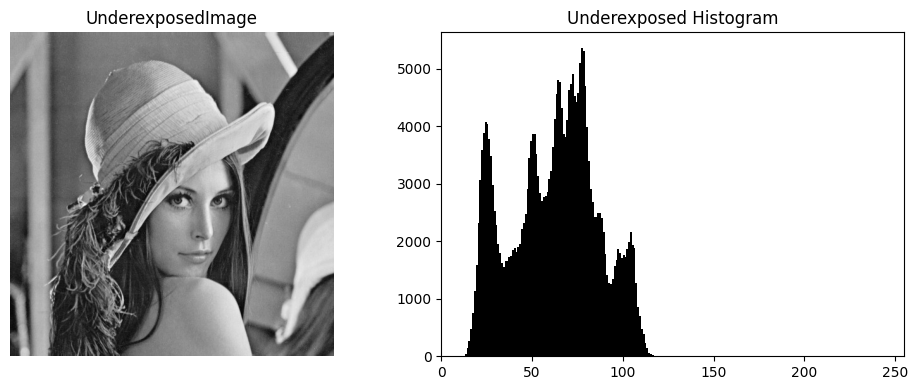

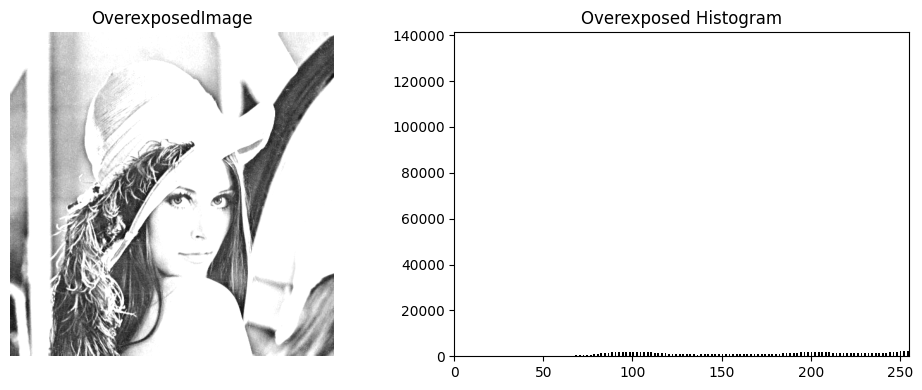

In [22]:
def exposure(img, factor):
    return(img.astype(np.float32)*factor).clip(0,255).astype(np.uint8)

g_under = exposure(img_gray, 0.5)
g_over = exposure(img_gray, 2.0)

show_image_hist(g_under, "Underexposed")
show_image_hist(g_over, "Overexposed")